In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns

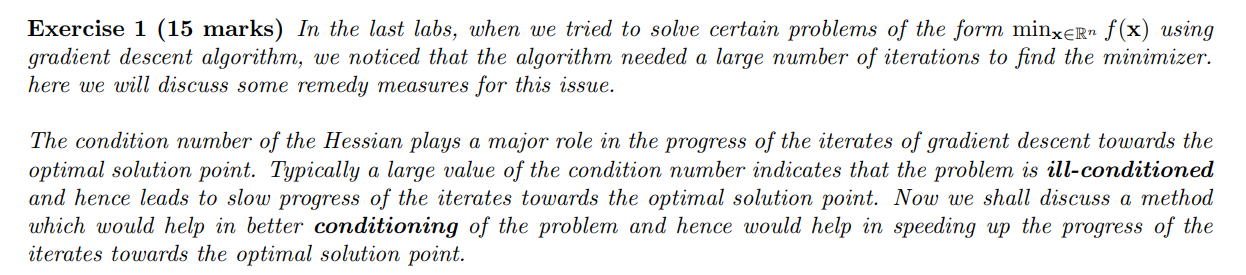

###1. Write code to find the Hessian matrix of the function f(x) and its condition number. Also find the minimizer and the minimum function value of f(x)

$f(x) = f(x_1,x_2) = x_1^2 + 4x_1x_2 + 1600x_2^2$

$\nabla{f(x)} = <2x_1+4x_2, 4x_1+3200x_2>$

First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function.

$\nabla^2{f(x)} = \begin{bmatrix} f_{xx} & f_{xy} \\ f_{yx} & f_{yy}\end{bmatrix}$

$\nabla^2{f(x)} = \begin{bmatrix} 2 & 4 \\ 4 & 3200\end{bmatrix}$

We shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  

In [2]:
# returns hessian of function 1 in lab 3.
def fx1hessian():
  return np.array([[2,4],[4,3200]])

# calculates condition number of any matrix. Numpy has inbuilt feature for this.
def condition_number(A):
  return np.linalg.cond(A, p=None)  #p = None takes 2 norm with SVD.

#checking if it works
print(condition_number(np.array([[1,0],[0,1]])))
# print(fx1hessian())

1.0


Ans:

To find the minimizer:

$\nabla{f(x)} = 0 \implies <2x_1+4x_2, 4x_1+3200x_2> = 0$

$\implies 2x_1+4x_2  = 0 \implies 4x_1+8x_2 = 0 \\
\implies 4x_1+3200x_2 = 0 $

using both equations

$3192x_2 = 0 \implies x_2 = 0$

$\implies x_1 = 0$

also note that the hessian $\nabla^2{f(x)} = \begin{bmatrix} 2 & 4 \\ 4 & 3200\end{bmatrix}$ is a positive definite matrix as sub determinants are positive.

Hence the point $(0,0)$ is the minimizer of the function and the minimum value is 0 for the function.


### 2. In theory provided above, we claimed D is symmetric and positive definite. Provide justification for that claim. Also based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix Q whose condition number needs to be analyzed in the new gradient scheme with scaling ?

In the theory provided above D is claimed to be substitute of $MM^T$ where M was the scaling matrix. Note that $(MM^T)^T = MM^T$ hence, D is symmetric. Secondly, $MM^T$ is positive semidefinite because

$x^TMM^Tx$ for any x becomes $(M^Tx)^T M^Tx = v^Tv \geq 0$ hence D is positive definite as well.

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is **ill-conditioned** and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better ***conditioning*** of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point.


In optimization, the Hessian matrix and its inverse play a crucial role in second-order optimization methods. The Hessian matrix represents the second-order partial derivatives of the objective function with respect to the variables. Its inverse, when used as a scaling matrix, can significantly impact the behavior of the optimization algorithm.

Now, let's consider why the inverse of the Hessian is used for scaling in optimization:

Curvature Information:

The Hessian matrix contains information about the curvature of the objective function.
The inverse of the Hessian can be seen as a way to "undo" the curvature, providing information about how much each component of the gradient should contribute to the update.

Conditioning of the Problem:

The Hessian inverse can help address ill-conditioned optimization problems where the scales of different variables vary significantly.
It acts as a preconditioner, making the optimization landscape more isotropic and improving convergence.

Quasi-Newton Methods:

Quasi-Newton methods aim to approximate the inverse Hessian without explicitly computing it. Methods like BFGS iteratively update an approximation to the Hessian inverse based on the changes in the gradient. While the Newton-Raphson method with the exact Hessian is powerful, computing and inverting the Hessian can be computationally expensive. Quasi-Newton methods provide a compromise by approximating the Hessian inverse iteratively, allowing for efficient optimization in practice.

Note that the gradient $\nabla_y{g(y)} = M^T∇_xf(x)$ and the Hessian is$∇^2_y
g(y) = M^T∇^2_xf(x)M$.


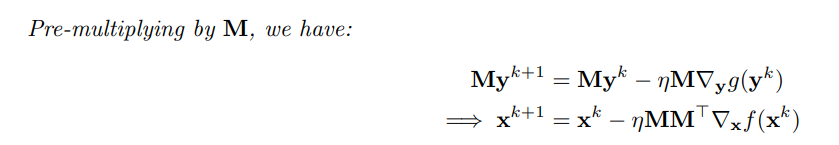

$\Rightarrow D = MM^T$
if we choose D to be diagonal, matrix D is symmetric and positive definite and hence can be written as $D = B^2$ , where B is also symmetric and positive definite. Denoting $B = D^{1/2}$ , we see that a useful choice for the matrix M is $M = B = D^{1/2}$
**Now since $M = D^{1/2}$ we can see that gradient is scaled by $D^{1/2}\nabla_x{f(x)}$ and hessian is scaled by $D^{1/2}∇^2_xf(x)D^{1/2}$**

D can be chosen as Diagonal approximation to the Hessian matrix $\nabla^2f( \mathbf{x})$, i.e., the diagonal matrix $\mathbf{D}^k$ that has the inverse second partial derivatives $\Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1}$ along the diagonal. This improves the performance of the gradient method dramatically, by providing automatic scaling of the units in which the components $x_i$ of $\mathbf{x}$ are measured. Because of such choice of $\mathbf{D}^k$, the condition number of $\mathbf{Q}=D^{1/2}∇^2_xf(x)D^{1/2}$ is improving and becoming so close to $1$ so that our gradient descent scheme is converging so quickly. Here, product with inverse of diagonal elements of hessian matrix with hessian matrix is causing the improvements in $\mathbf{Q}$ by becoming so close to condition number of identity matrix, which will help the algorithm converge faster.

In [3]:
import numpy as np
from scipy.linalg import fractional_matrix_power
hessian = fx1hessian()
Dk = np.array([[1/2, 0],[0, 1/3200]])
Q = fractional_matrix_power(Dk, 0.5)@hessian@fractional_matrix_power(Dk, 0.5)

print(Q)

[[1.   0.05]
 [0.05 1.  ]]


3.
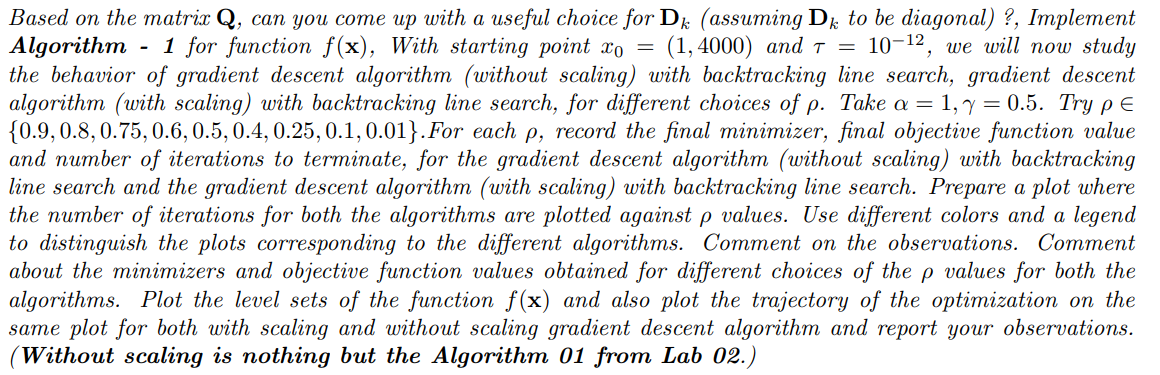

Since $D_k$ we are choosing to be inverse second partial derivatives $\Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1}$ along the diagonal. For $f(x)$, $D_k = \begin{bmatrix} 1/f_{xx} & 0 \\ 0 & 1/f_{yy}  \end{bmatrix} = \begin{bmatrix} 1/2 & 0 \\ 0 & 1/3200  \end{bmatrix}$

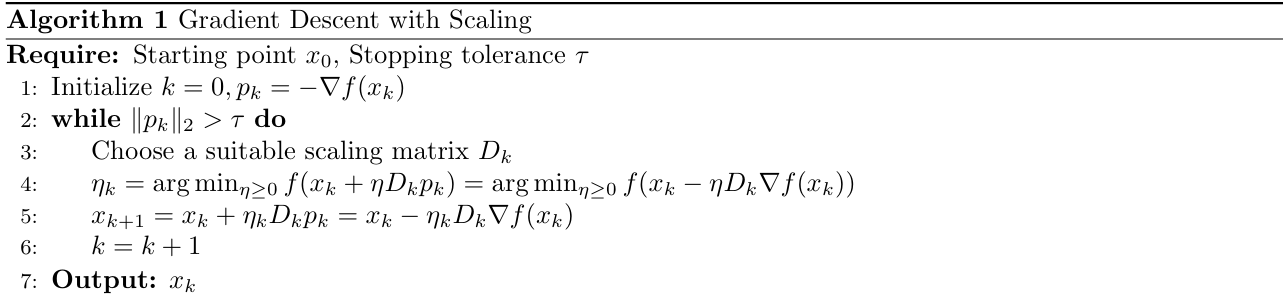

Gradient Descent with scaling backtracking condition will look like:

$f(x_k + \alpha D_k p_k) > f(x_k) + \gamma \alpha \nabla{f(x_k)}^TD_k p_k$

In [4]:
def fx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return x1**2 + 4*x1*x2 + 1600*x2**2

def gradient_fx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([2*x1+4*x2, 4*x1+3200*x2])

def hessian_fx1(xk):
  return np.array([[2,4],[4,3200]])

def dk_fx1():
  return np.array([[1/2, 0],[0, 1/3200]])

def get_alpha(xk, alpha0, rho, gamma):
  alpha = alpha0
  pk = -1*gradient_fx1(xk)
  while fx1(xk + alpha*pk) > (fx1(xk) + gamma*alpha*gradient_fx1(xk)@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_fx1(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    alpha =  get_alpha(xk, alpha0, rho, gamma)
    xk = xk + alpha*pk
    pk = -1*gradient_fx1(xk)
    count += 1
    xks.append(xk)
  return count, xk, fx1(xk),xks

def get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_fx1(xk)
  while fx1(xk + alpha*Dk@pk) > (fx1(xk) + gamma*alpha*gradient_fx1(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0,Dk):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_fx1(xk)
  alpha = alpha0
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    alpha =  get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk)
    xk = xk + alpha*Dk@pk
    pk = -1*gradient_fx1(xk)
    xks.append(xk)
    count += 1
  return count, xk, fx1(xk), xks

In [1]:
#initializations
x0 = np.array([1,4000])
tau = 1e-12
alpha0 = 1
gamma = 0.5
rhos = [0.9, 0.8,0.75,0.6,0.5,0.4,0.25,0.1,0.01]


## empty array to store
iterations_backtracking_without_scaling = []
iterations_backtracking_with_scaling = []
minimizer_backtracking_without_scaling = []
minimizer_backtracking_with_scaling = []
minimum_backtracking_with_scaling = []
minimum_backtracking_without_scaling = []

print("|rho       |iterations        |final minimizer    | final value   |type    ")
print("---------------------------------------------------------------------------")
for rho in rhos:
  Dk = dk_fx1()
  count1, final_xk1, final_val1, xks1 = gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0)
  count2, final_xk2, final_val2, xks2 = gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0, Dk)
  print(f"|{rho}    |{count1}   |{final_xk1}    |{final_val1}     | without scaling")
  print(f"|{rho}    |{count2}   |{final_xk2}    |{final_val2}     | with scaling")
  print("---------------------------------------------------------------------------")


  ##Plotting Trajectory
  x = np.linspace(-8000, 6000, 4000)
  y = np.linspace(-1000, 4200, 4000)
  X, Y = np.meshgrid(x, y)
  Z = fx1((X,Y))
  p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())  #,locator = ticker.LogLocator()
  plt.title(f"plot for rho: {rho}")
  cbar = plt.colorbar(p)
  xcordinates1 = [xk1[0] for xk1 in xks1]
  ycordinates1 = [xk1[1] for xk1 in xks1]
  plt.plot(xcordinates1, ycordinates1, color='red', marker = 'o', markersize = 2, label = 'without scaling')
  xcordinates2 = [xk1[0] for xk1 in xks2]
  ycordinates2 = [xk1[1] for xk1 in xks2]
  plt.plot(xcordinates2, ycordinates2, color='blue',  marker = 'o', markersize = 2, label = 'with scaling')
  plt.legend()
  plt.show()
  iterations_backtracking_without_scaling.append(count1)
  iterations_backtracking_with_scaling.append(count2)
  minimizer_backtracking_without_scaling.append(final_xk1)
  minimizer_backtracking_with_scaling.append(final_xk2)
  minimum_backtracking_without_scaling.append(final_val1)
  minimum_backtracking_with_scaling.append(final_val2)

NameError: name 'np' is not defined

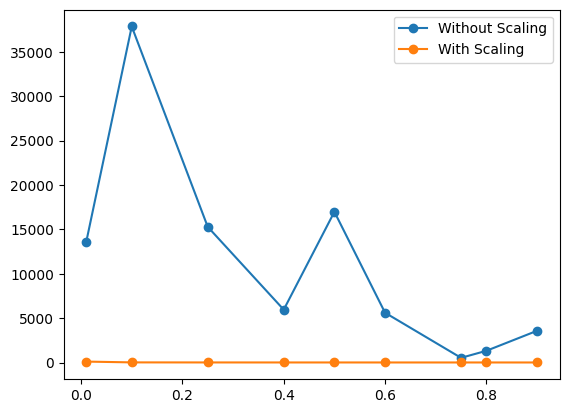

In [6]:
plt.plot(rhos, iterations_backtracking_without_scaling, marker = 'o', label = "Without Scaling")
plt.plot(rhos, iterations_backtracking_with_scaling, marker = 'o', label = "With Scaling")
plt.legend()
plt.show()

Comment on the observations. Comment
about the minimizers and objective function values obtained for different choices of the ρ values for both the
algorithms. Plot the level sets of the function f(x) and also plot the trajectory of the optimization on the
same plot for both with scaling and without scaling gradient descent algorithm and report your observations.

Scaling significantly reduced the number of interations this is because the hessian was ill conditioned and scaling it with Dk we made it almost identity matrix. As we decrease the rho, the no. of iterations also decrease. As we see the plots we observe that the trajectory of the scaling backtracking is not straight, rather it is going to minimizer in a round about way, though is takes less iterations but its trajectory is different. In without scaling versions, we see that, initial jump towards minimizer is high, but as it gets closer and closer to minimizers its step length is reduced significatly and take much time to converge. One thing to note is that the function is stretched in x axis and Dk helps to unstretch that scale and moves along that route.

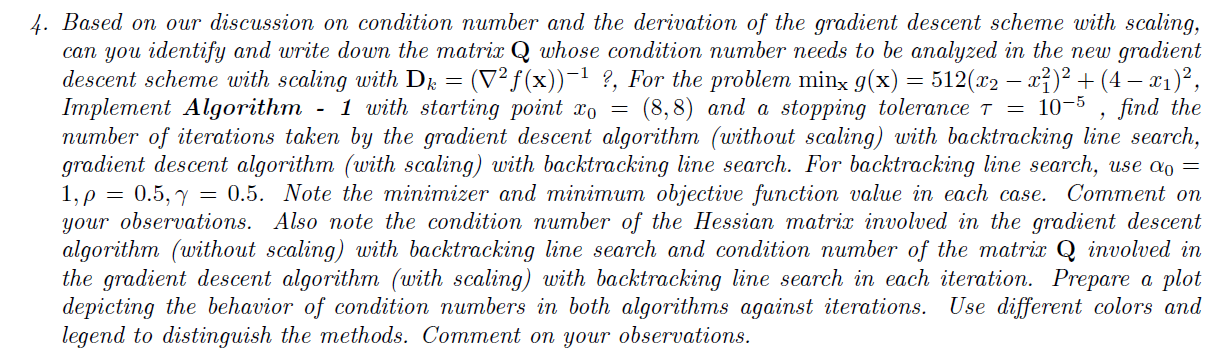

The matrix Q to be analysed is:

$Q = D_k^{\frac{1}{2}}\nabla^2{f(x)}D_k^{\frac{1}{2}} =D_k^{\frac{1}{2}}D_k^{-1}D_k^{\frac{1}{2}} = I$ is the identity itself.

$g(x) = 512(x_2 -x_1^2)^2 + (4-x_1)^2$

$\nabla_x{g(x)} = <-2048(x_2-x_1^2)x_1 -8 + 2x_1, 1024(x_2-x_1^2)>$

$\nabla_x^2{g(x)}  = \begin{bmatrix} 6144x_1^2 - 2048x_2 + 2 & -2048x_1 \\ -2048x_1 & 1024 \end{bmatrix}$

In [7]:
def gx1(xk):
  return  (512*(xk[1]-xk[0]**2)**2) + (4-xk[0])**2

def gradient_gx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array( [-2048*(x2-x1**2)*x1 - 8 + 2*x1, 1024*(x2-x1**2)] )

def hessian_gx1(xk):
  x1 = xk[0]
  x2 = xk[1]
  return np.array([[6144*x1**2-2048*x2+2,-2048*x1],[-2048*x1,1024]])

def dk_gx1(xk):
  return np.linalg.inv(hessian_gx1(xk))

def get_alpha(xk, alpha0, rho, gamma):
  alpha = alpha0
  pk = -1*gradient_gx1(xk)
  while gx1(xk + alpha*pk) > (gx1(xk) + gamma*alpha*gradient_gx1(xk)@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_gx1(xk)
  xks = []
  xks.append(xk)
  cond_hs = []

  while norm(pk)>tau:

    ## storing condition number
    hessian = hessian_gx1(xk)
    cond_hs.append(condition_number(hessian))

    alpha =  get_alpha(xk, alpha0, rho, gamma)
    xk = xk + alpha*pk
    pk = -1*gradient_gx1(xk)
    count += 1
    xks.append(xk)
  return count, xk, gx1(xk),xks, cond_hs

def get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_gx1(xk)
  while gx1(xk + alpha*Dk@pk) > (gx1(xk) + gamma*alpha*gradient_gx1(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0,Dk):
  xk = np.copy(x0)
  count = 0
  pk = -1*gradient_gx1(xk)
  alpha = alpha0
  xks = []
  xks.append(xk)
  Dk = dk_gx1(xk)
  cond_q = []
  cond_hs = []

  while norm(pk)>tau:

    ## storing condition number
    hessian = hessian_gx1(xk)
    cond_hs.append(condition_number(hessian))
    Dk = dk_gx1(xk)
    Q = fractional_matrix_power(Dk, 0.5)@hessian@fractional_matrix_power(Dk, 0.5)
    condition_no = condition_number(Q)
    cond_q.append(condition_no)

    alpha =  get_alpha_with_scaling(xk, alpha0, rho, gamma, Dk)
    xk = xk + alpha*Dk@pk
    pk = -1*gradient_gx1(xk)
    Dk = dk_gx1(xk)
    xks.append(xk)
    count += 1
  return count, xk, gx1(xk), xks, cond_hs, cond_q

|rho       |iterations        |final minimizer    | final value   |type    
---------------------------------------------------------------------------


<ipython-input-7-ea71143645c2>:2: RuntimeWarning: overflow encountered in long_scalars
  return  (512*(xk[1]-xk[0]**2)**2) + (4-xk[0])**2


|0.5    |902403   |[ 3.99995978 15.99967825]    |1.6175204028483831e-09     | without scaling
|0.5    |48   |[ 4. 16.]    |2.356430075812841e-25     | with scaling
---------------------------------------------------------------------------


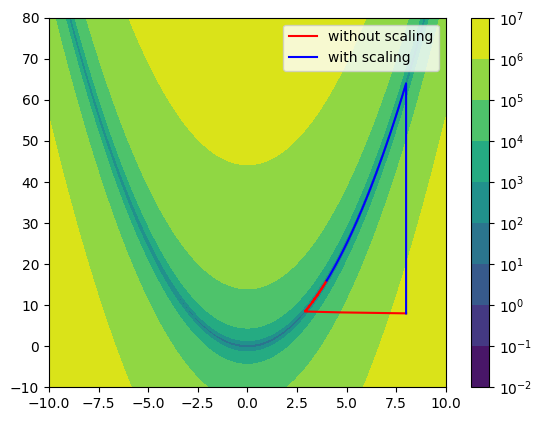

In [8]:
#initializations
x0 = np.array([8,8])
tau = 1e-5
alpha0 = 1
gamma = 0.5
rhos = [0.5]


## empty array to store
iterations_backtracking_without_scaling = []
iterations_backtracking_with_scaling = []
minimizer_backtracking_without_scaling = []
minimizer_backtracking_with_scaling = []
minimum_backtracking_with_scaling = []
minimum_backtracking_without_scaling = []

print("|rho       |iterations        |final minimizer    | final value   |type    ")
print("---------------------------------------------------------------------------")
for rho in rhos:
  Dk = dk_gx1(x0)
  count1, final_xk1, final_val1, xks1, cond_hs = gradient_descent_with_backtracking(x0, tau, rho, gamma, alpha0)
  count2, final_xk2, final_val2, xks2, cond_hs_with_scale, cond_q_with_scale = gradient_descent_with_backtracking_with_scaling(x0, tau, rho, gamma, alpha0, Dk)
  print(f"|{rho}    |{count1}   |{final_xk1}    |{final_val1}     | without scaling")
  print(f"|{rho}    |{count2}   |{final_xk2}    |{final_val2}     | with scaling")
  print("---------------------------------------------------------------------------")


  ##Plotting Trajectory
  x = np.linspace(-10, 10, 1000)
  y = np.linspace(-10, 80, 1000)
  X, Y = np.meshgrid(x, y)
  Z = gx1((X,Y))
  p = plt.contourf(X,Y,Z,locator = ticker.LogLocator())  #,locator = ticker.LogLocator()
  cbar = plt.colorbar(p)
  xcordinates1 = [xk1[0] for xk1 in xks1]
  ycordinates1 = [xk1[1] for xk1 in xks1]
  plt.plot(xcordinates1, ycordinates1, color='red', label = 'without scaling')
  xcordinates2 = [xk1[0] for xk1 in xks2]
  ycordinates2 = [xk1[1] for xk1 in xks2]
  plt.plot(xcordinates2, ycordinates2, color='blue', label = 'with scaling')
  plt.legend()
  plt.show()

  iterations_backtracking_without_scaling.append(count1)
  iterations_backtracking_with_scaling.append(count2)
  minimizer_backtracking_without_scaling.append(final_xk1)
  minimizer_backtracking_with_scaling.append(final_xk2)
  minimum_backtracking_without_scaling.append(final_val1)
  minimum_backtracking_with_scaling.append(final_val2)

Note the minimizer and minimum objective function value in each case. Comment on
your observations. Also note the condition number of the Hessian matrix involved in the gradient descent
algorithm (without scaling) with backtracking line search and condition number of the matrix Q involved in
the gradient descent algorithm (with scaling) with backtracking line search in each iteration. Prepare a plot
depicting the behavior of condition numbers in both algorithms against iterations. Use different colors and
legend to distinguish the methods. Comment on your observations

The minimizer and minimum is (4,16) and 0 respectively in each case. As we observe that the one with scale takes long time to run with about 900000 iterations !, whereas the one with scale only took 48 runs. This shows how important the conditioning of the matrix is. If we observe the trajectory also, the with scale version takes round about way to reach the minimum, but only take 48 steps.

Text(0.5, 1.0, 'Condition number of Hessian in Without Scale Algorithm')

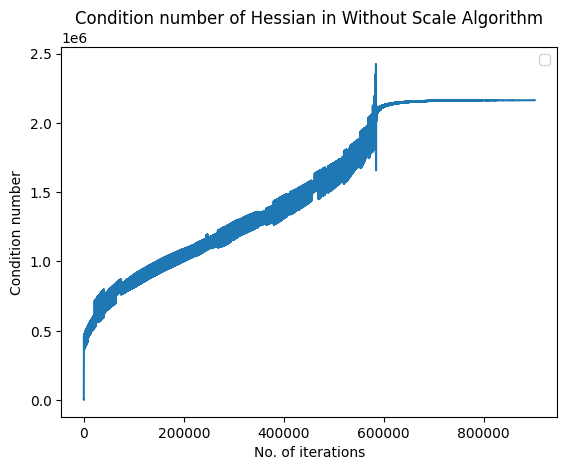

In [9]:
plt.plot([i+1 for i in range(count1)], cond_hs)
plt.xlabel('No. of iterations')
plt.ylabel("Condition number")
plt.legend()
plt.title("Condition number of Hessian in Without Scale Algorithm")

Text(0.5, 1.0, 'Condition number of Hessian in With Scale Algorithm')

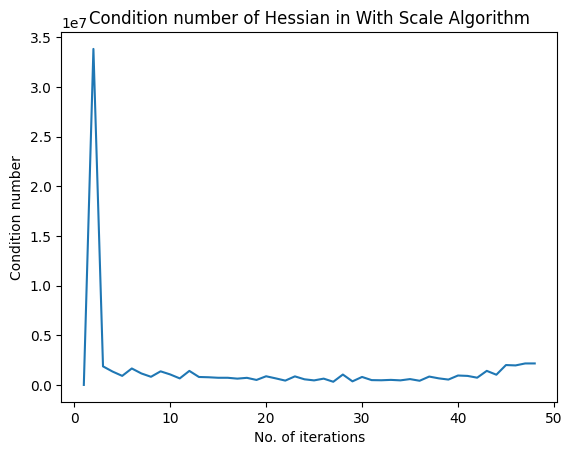

In [10]:
plt.plot([i+1 for i in range(count2)], cond_hs_with_scale)
plt.xlabel('No. of iterations')
plt.ylabel("Condition number")
plt.title("Condition number of Hessian in With Scale Algorithm")

Text(0.5, 1.0, "Condition number of Q in 'With Scale' Algorithm")

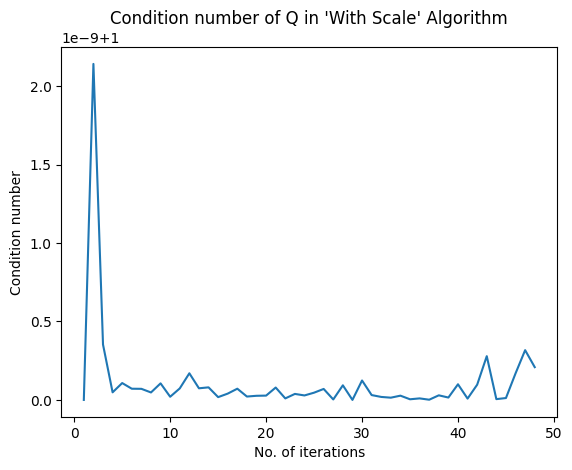

In [11]:
plt.plot([i+1 for i in range(count2)], cond_q_with_scale)
plt.xlabel('No. of iterations')
plt.ylabel("Condition number")
plt.title("Condition number of Q in 'With Scale' Algorithm")

In [12]:
for i in range(count2):
  print(f"iteration no. : {i} | Condition no. : {cond_q_with_scale[i]} | xk : {xks2[i]}" )
  print("--------------------------------------------------------------------")

iteration no. : 0 | Condition no. : 1.0000000000000113 | xk : [8 8]
--------------------------------------------------------------------
iteration no. : 1 | Condition no. : 1.0000000021417927 | xk : [ 7.99993025 63.99888395]
--------------------------------------------------------------------
iteration no. : 2 | Condition no. : 1.0000000003530183 | xk : [ 7.87493305 61.99894623]
--------------------------------------------------------------------
iteration no. : 3 | Condition no. : 1.0000000000484224 | xk : [ 7.76095965 60.21169264]
--------------------------------------------------------------------
iteration no. : 4 | Condition no. : 1.0000000001075267 | xk : [ 7.59231687 57.61483501]
--------------------------------------------------------------------
iteration no. : 5 | Condition no. : 1.0000000000714038 | xk : [ 7.47306175 55.83243017]
--------------------------------------------------------------------
iteration no. : 6 | Condition no. : 1.000000000070728 | xk : [ 7.36148178 54.1

In [14]:
for i in range(count2):
  print(f"iteration no. : {i} | Condition no. of hessian : {cond_hs_with_scale[i]} | xk : {xks2[i]}" )
  print("--------------------------------------------------------------------")

iteration no. : 0 | Condition no. of hessian : 1213.714059716036 | xk : [8 8]
--------------------------------------------------------------------
iteration no. : 1 | Condition no. of hessian : 33816256.69198524 | xk : [ 7.99993025 63.99888395]
--------------------------------------------------------------------
iteration no. : 2 | Condition no. of hessian : 1868772.9531306524 | xk : [ 7.87493305 61.99894623]
--------------------------------------------------------------------
iteration no. : 3 | Condition no. of hessian : 1344231.7569600309 | xk : [ 7.76095965 60.21169264]
--------------------------------------------------------------------
iteration no. : 4 | Condition no. of hessian : 911944.1797646735 | xk : [ 7.59231687 57.61483501]
--------------------------------------------------------------------
iteration no. : 5 | Condition no. of hessian : 1656855.793796962 | xk : [ 7.47306175 55.83243017]
--------------------------------------------------------------------
iteration no. : 